In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute, QuantumRegister, ClassicalRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-01-07 19:22:38,316: Credentials are already in use. The existing account in the session will be replaced.


In [50]:
qr = QuantumRegister(3) # we only need three qubits for this particular teleportation circuit
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr, cr)

In [51]:
qc.x(0)
qc.z(0) # prepare our "unknown state"
qc.barrier() # for visualisation purposes

In [52]:
qc.h(1)
qc.cx(1,2) # prepare the EPR pair by entangeling states 1 and 2
qc.barrier()

In [53]:
qc.cx(0,1)
qc.h(0)  # entangle unknown state with Alice's EPR state
qc.measure(0,0)
qc.measure(1,1)
qc.barrier()
qc.cx(1,2)
qc.barrier()

In [54]:
qc.z(2)
qc.x(2)
qc.measure(2,2)

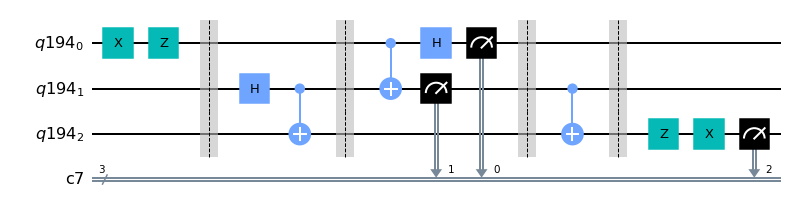

In [55]:
qc.draw()

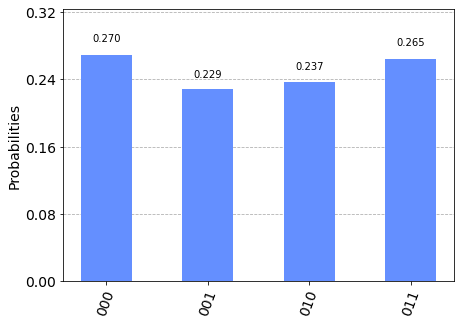

In [56]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
job_result = job.result()
results = job_result.get_counts(qc)
plot_histogram(results)